In [1]:
#mnist dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


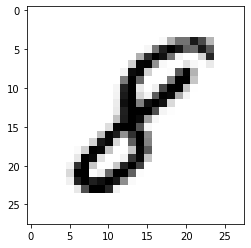

In [2]:
import matplotlib.pyplot as plt 
image_index = 7777 
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=50,validation_data=(x_test,y_test))

Epoch 1/10
50/50 [==============================] - 17s 343ms/step - loss: 0.6805 - accuracy: 0.8292 - val_loss: 0.2061 - val_accuracy: 0.9399
Epoch 2/10
50/50 [==============================] - 17s 332ms/step - loss: 0.1546 - accuracy: 0.9537 - val_loss: 0.1024 - val_accuracy: 0.9694
Epoch 3/10
50/50 [==============================] - 16s 327ms/step - loss: 0.0898 - accuracy: 0.9733 - val_loss: 0.0666 - val_accuracy: 0.9789
Epoch 4/10
50/50 [==============================] - 17s 332ms/step - loss: 0.0649 - accuracy: 0.9808 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 5/10
50/50 [==============================] - 17s 336ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0458 - val_accuracy: 0.9845
Epoch 6/10
50/50 [==============================] - 16s 326ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 7/10
50/50 [==============================] - 16s 329ms/step - loss: 0.0393 - accuracy: 0.9887 - val_loss: 0.0385 - val_accuracy: 0.9865

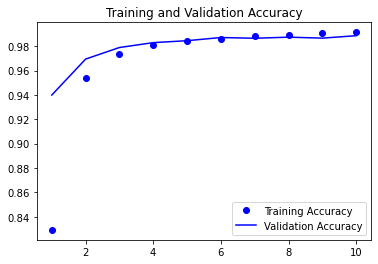

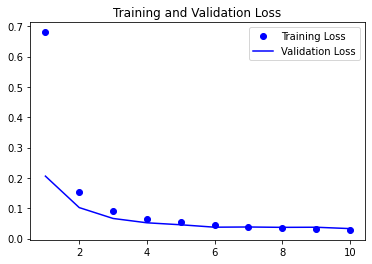

In [6]:
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(1,len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b' ,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss,'bo', label='Training Loss')
plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()